In [26]:
import bw2data as bd
import bw2calc as bc

In [27]:
bd.projects.set_current("bw25_plca_grid_expansion")

In [28]:
method = (
    "EF v3.1 no LT",
    "climate change no LT",
    "global warming potential (GWP100) no LT",
)

In [29]:
recalculate = False

## Static vs prospective expansion

In [30]:

static_expansion_nodes = sorted([node for node in bd.Database("grid_expansion_static")])
prospective_expansion_nodes_base = sorted([node for node in bd.Database("grid_expansion_prospective") if "Base" in node["name"]])
prospective_expansion_nodes_rcp26 = sorted([node for node in bd.Database("grid_expansion_prospective") if "RCP26" in node["name"]])
prospective_expansion_nodes_rcp19 = sorted([node for node in bd.Database("grid_expansion_prospective") if "RCP19" in node["name"]])
prospective_expansion_nodes = prospective_expansion_nodes_base + prospective_expansion_nodes_rcp26 + prospective_expansion_nodes_rcp19

In [31]:
if recalculate:
    # static expansion
    results_components = {}
    lca = bc.LCA(demand={static_expansion_nodes[0]: 1}, method=method)
    lca.lci(factorize=True)
    for node in static_expansion_nodes:
        component_results = {}
        for exc in node.technosphere():
            lca.lcia(demand={exc.input.id: exc.amount})
            component_results[exc.input['name']] = lca.score
        results_components[node["name"]] = component_results
        
    # prospective expansion
    lca = bc.LCA(demand={prospective_expansion_nodes[0]: 1}, method=method)
    lca.lci(factorize=True)
    for node in prospective_expansion_nodes:
        component_results = {}
        for exc in node.technosphere():
            lca.lcia(demand={exc.input.id: exc.amount})
            component_results[exc.input['name']] = lca.score
        results_components[node["name"]] = component_results
            

/Users/timodiepers/anaconda3/envs/plca-grid-expansion/lib/python3.11/site-packages/bw2calc/lca_base.py:127: SparseEfficiencyWarning: splu converted its input to CSC format
  self.solver = factorized(self.technosphere_matrix)
/Users/timodiepers/anaconda3/envs/plca-grid-expansion/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 1.51e+12)
  warnings.warn(msg, UmfpackWarning)
/Users/timodiepers/anaconda3/envs/plca-grid-expansion/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 9.43e+12)
  warnings.warn(msg, UmfpackWarning)


In [33]:
import json
with open("data/expansion_component_results.json", "w") as f:
    json.dump(results_components, f)

In [34]:
import pandas as pd
results_components = json.load(open("data/expansion_component_results.json"))
df_components = pd.DataFrame(results_components)

df_components.columns = pd.MultiIndex.from_tuples(
    [(col.split('_', 2)[1], col.rsplit('_', 1)[1]) for col in df_components.columns]
)
df_components

static                \
                                                     2025          2030   
Overhead line, 400kV                         7.003311e+08  1.750828e+09   
Overhead line HVDC                           2.385619e+07  5.964048e+07   
Land cable, oil insulated, copper, HVDC      3.747859e+08  9.369649e+08   
Overhead line, 150kV                         6.146512e+08  1.536628e+09   
Land cable, vpe insulated, aluminium, 50kV   2.234862e+06  5.587155e+06   
Land cable, oil insulated, copper, 150kV     1.336050e+07  3.340126e+07   
Transformer, 250MVA                          1.363420e+07  3.408551e+07   
Overhead line, 10kV                          8.834335e+07  2.208584e+08   
Land cable, vpe insulated, aluminium, 10kV   2.153702e+08  5.384254e+08   
Land cable, epr insulated, copper, 11kV      1.145041e+08  2.862602e+08   
Transformer, 40MVA                           4.061180e+07  1.015295e+08   
Gas insulated switchgear, 420kV              2.313022e+08  5.782554e+08   
Substation, MV                               1.543307e+07  3.858268e+07   
Overhead line, 0.4kV                         2.310026e+07  5.775066e+07   
Land cable, vpe insulated, aluminium, 0.4kV  4.959347e+08  1.239837e+09   
Land cable, vpe insulated, copper, 1kV       7.091750e+07  1.772937e+08   
Transformer, 315kVA                          7.475155e+07  1.868789e+08   
Substation, LV                               1.868745e+07  4.671862e+07   

                                                                         \
                                                     2035          2037   
Overhead line, 400kV                         1.750828e+09  7.003311e+08   
Overhead line HVDC                           5.964048e+07  2.385619e+07   
Land cable, oil insulated, copper, HVDC      9.369649e+08  3.747859e+08   
Overhead line, 150kV                         1.536628e+09  6.146512e+08   
Land cable, vpe insulated, aluminium, 50kV   5.587155e+06  2.234862e+06   
Land cable, oil insulated, copper, 150kV     3.340126e+07  1.336050e+07   
Transformer, 250MVA                          3.408551e+07  1.363420e+07   
Overhead line, 10kV                          2.208584e+08  8.834335e+07   
Land cable, vpe insulated, aluminium, 10kV   5.384254e+08  2.153702e+08   
Land cable, epr insulated, copper, 11kV      2.862602e+08  1.145041e+08   
Transformer, 40MVA                           1.015295e+08  4.061180e+07   
Gas insulated switchgear, 420kV              5.782554e+08  2.313022e+08   
Substation, MV                               3.858268e+07  1.543307e+07   
Overhead line, 0.4kV                         5.775066e+07  2.310026e+07   
Land cable, vpe insulated, aluminium, 0.4kV  1.239837e+09  4.959347e+08   
Land cable, vpe insulated, copper, 1kV       1.772937e+08  7.091750e+07   
Transformer, 315kVA                          1.868789e+08  7.475155e+07   
Substation, LV                               4.671862e+07  1.868745e+07   

                                                                         \
                                                     2040          2045   
Overhead line, 400kV                         3.887273e+07  6.478788e+07   
Overhead line HVDC                           1.676545e+07  2.794241e+07   
Land cable, oil insulated, copper, HVDC      2.633888e+08  4.389813e+08   
Overhead line, 150kV                         8.604508e+08  1.434085e+09   
Land cable, vpe insulated, aluminium, 50kV   3.128586e+06  5.214309e+06   
Land cable, oil insulated, copper, 150kV     1.870338e+07  3.117231e+07   
Transformer, 250MVA                          9.554739e+06  1.592456e+07   
Overhead line, 10kV                          1.278629e+08  2.131049e+08   
Land cable, vpe insulated, aluminium, 10kV   3.117140e+08  5.195233e+08   
Land cable, epr insulated, copper, 11kV      3.005733e+08  5.009554e+08   
Transformer, 40MVA                           5.764619e+07  9.607698e+07   
Gas insulated switchgear, 420kV              3.283206e+08  5.472009e+08   

## Plot

In [35]:
from RWTHColors import ColorManager

cm = ColorManager()

plot_colors = []
plot_colors_light = []
color_list = [
    cm.RWTHBlau,
    #   cm.RWTHPetrol,
    cm.RWTHTuerkis,
    cm.RWTHGruen,
    cm.RWTHMaiGruen,
    cm.RWTHOrange,
    cm.RWTHRot,
    # cm.RWTHBordeaux,
    # cm.RWTHViolett,
    cm.RWTHLila,
]
intensities = [100, 50, 10]

for intensity in intensities:
    for color in color_list:
        plot_colors.append(color.p(intensity))

for intensity in [75, 50, 10]:
    for color in color_list:
        plot_colors_light.append(color.p(intensity))

plot_colors_components = [
    cm.RWTHGruen.p(100), # overhead lines
    cm.RWTHPetrol.p(100), # cables
    cm.RWTHMagenta.p(75), # switchgears
    cm.RWTHLila.p(100), # transformers
    cm.RWTHViolett.p(100), # substations
]

plot_colors_components = [
    cm.RWTHBlau.p(100), # overhead lines
    cm.RWTHGruen.p(100), # overhead lines
    cm.RWTHOrange.p(75), # switchgears
    cm.RWTHRot.p(100), # transformers
    cm.RWTHViolett.p(100), # substations
]

plot_colors_materials = [
    cm.RWTHOrange.p(100), # aluminium
    cm.RWTHTuerkis.p(100), # iron & steel
    cm.RWTHRot.p(50), # copper
    cm.RWTHGelb.p(75), # SF6
    cm.RWTHMaiGruen.p(100), # plastics
    cm.RWTHPetrol.p(50), # concrete  
    cm.RWTHSchwarz.p(50), # other materials
]
plot_colors_processes = [
    cm.RWTHGelb.p(100), # electricity
    cm.RWTHRot.p(75), # heat
    cm.RWTHTuerkis.p(50), # iron & steel (process emissions)
    cm.RWTHSchwarz.p(75), # coal
    cm.RWTHGelb.p(75), # SF6
    cm.RWTHBlau.p(50), # transport
    cm.RWTHOrange.p(50), # aluminium (process emissions)
    cm.RWTHViolett.p(75), # clinker
    cm.RWTHSchwarz.p(50), # other processes
]

In [36]:
# from brokenaxes import brokenaxes
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np
# import matplotlib.colors as mcolors
# def darken_color(color, amount=0.5):
#     try:
#         c = mcolors.cnames[color]
#     except:
#         c = color
#     c = mcolors.to_rgb(c)
#     return mcolors.to_hex([max(0, min(1, c[0] * amount)),
#                            max(0, min(1, c[1] * amount)),
#                            max(0, min(1, c[2] * amount))])
    
# data_base = {"Score": [69383294328.312 / 1e9]}
# df_base = pd.DataFrame(data_base)

# data_static = {"Score": df_components["static"].sum().values/1e9}
# df_static = pd.DataFrame(data_static)

# data_prospective = {"Score": df_components["RCP26"].sum().values/1e9}
# df__prospective = pd.DataFrame(data_prospective)

# fig = plt.figure(figsize=(12, 2.5))
# fig.subplots_adjust(wspace=0.1)
# bax = brokenaxes(xlims=((0, 11), (65, 100)), d=0.007)

# # Starting point for the add-ons
# addon_start = sum(df_base["Score"])

# # Settings for the bars
# base_bar_height = 1
# addon_bar_height = base_bar_height * 0.35  # 40% of the base bar's height

# # Plot the main product's scores
# left_extent = 0
# for score in df_base["Score"]:
#     bax.barh(
#         0,
#         width=score,
#         left=left_extent,
#         height=base_bar_height,
#         # color=cm.RWTHBlau.p(100),
#         color="#aaaaaa",
#         edgecolor="black",
#         linewidth=0.5,
#     )
#     mid_point = 5.5
#     bax.text(
#         # addon_start - 2.5,
#         mid_point,
#         0,
#         "status quo",
#         ha="center",
#         va="center",
#         color="black",
#         rotation=45,
#     )
#     left_extent += score


# def plot_addons(df, addon_start, y_position, bar_height, label, colors):
#     bax.text(addon_start - 0.25, y_position, "2023", ha="right", va="center", rotation=90)
#     total_width = addon_start  # Initialize total width to the starting point
#     for (idx, score), year in zip(
#         enumerate(df["Score"]),
#         ["2025", "2030", "2035", "2037", "2040", "2045"],
#     ):
#         bax.barh(
#             y_position,
#             width=score,
#             left=addon_start,
#             height=bar_height,
#             color=colors[idx],
#             edgecolor="black",
#             linewidth=0.5,
#         )
        
#         pos_year = addon_start + score - 0.5
#         bax.text( 
#             pos_year,
#             y_position,
#             year,
#             ha="center",
#             va="center",
#             color="black",
#             rotation=90,
#         )
#         bax.arrow(
#             pos_year - 1.8,
#             y_position,
#             0.8,
#             0,
#             width=0.01,
#             head_width=0.05,
#             head_length=0.5,
#             fc=darken_color(colors[idx], .4),
#             ec=darken_color(colors[idx], .4),
#             lw=0.5,
#             # overhang=0.5,
#         )
#         addon_start += score
#         total_width += score  # Accumulate the total width

#     # Place the label to the right of the last bar
#     bax.text(total_width, y_position, label, ha="left", va="center")
    
# colors_addon = [
#     cm.RWTHBlau.p(100),
#     cm.RWTHBlau.p(75),
#     cm.RWTHBlau.p(50),
#     cm.RWTHBlau.p(25),
#     cm.RWTHGruen.p(100),
#     cm.RWTHGruen.p(75),
#     ]
# plot_addons(
#     df_static,
#     addon_start,
#     base_bar_height * 0.325,
#     addon_bar_height,
#     "   static expansion",
#     colors=colors_addon,
# )  # Generate colors)
# plot_addons(
#     df__prospective,
#     addon_start,
#     -base_bar_height * 0.325,
#     addon_bar_height,
#     "   prospective expansion",
#     colors=colors_addon,
# )

# bax.set_xlabel("GWI [Mt CO2-eq]", labelpad=25)

# x_static=addon_start
# x_prospective=addon_start
# for label_pos, v1, v2, color in zip([2, 7, 14, 19.3, 22.2, 26], df_static.values, df__prospective.values, colors_addon):
#     reduction = int((v1-v2)/v1*100)
#     bax.text(
#         addon_start + label_pos,
#         0,
#         f"-{reduction}%",
#         horizontalalignment="center",
#         verticalalignment="center",
#         rotation=45,
#         color=darken_color(color, 0.4),
#         # color='black',
#     )

#     x_static = x_static + v1
#     x_prospective = x_prospective + v2
#     bax.plot([x_static, x_prospective], [base_bar_height * 0.325 - addon_bar_height / 2, - base_bar_height * 0.325 + addon_bar_height / 2], color="black", linewidth=0.5, linestyle="--")

# bax.axs[0].set_yticks([]) 
# bax.axs[0].set_yticklabels([])

# plt.savefig("fig_static_vs_prospective_arrows.svg", format="svg", bbox_inches='tight')
# plt.show()

Draft with 3 bars:

In [37]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np
# import matplotlib.colors as mcolors
# from brokenaxes import brokenaxes

# # Data
# data_base = {"Score": [69383294328.312 / 1e9]}
# df_base = pd.DataFrame(data_base)

# data_static = {"Score": df_components["static"].sum().values / 1e9}
# df_static = pd.DataFrame(data_static)

# data_rcp26 = {"Score": df_components["RCP26"].sum().values / 1e9}
# df_rcp26 = pd.DataFrame(data_rcp26)

# data_rcp19 = {"Score": df_components["RCP19"].sum().values / 1e9}
# df_rcp19 = pd.DataFrame(data_rcp19)

# # Figure and broken axes setup
# fig = plt.figure(figsize=(12, 2.5))
# fig.subplots_adjust(wspace=0.1)
# bax = brokenaxes(xlims=((0, 6), (59, 100)), d=0.007)
# bax.set_ylim(-1.2, 1.2)

# # Base bar settings
# addon_start = sum(df_base["Score"])
# base_bar_height = 2
# addon_bar_height = base_bar_height * 0.25

# # Plot the base product score
# left_extent = 0
# for score in df_base["Score"]:
#     bax.barh(0, width=score, left=left_extent, height=base_bar_height,
#              color="#aaaaaa", edgecolor="black", linewidth=0.5)
#     bax.text(64.5, 0, "status quo\n(2023)", ha="center", va="center", color="black", rotation=45)
#     left_extent += score

# # Function to plot add-ons
# def plot_addons(df, addon_start, y_position, bar_height, label, colors):
#     total_width = addon_start
#     for idx, score in enumerate(df["Score"]):
#         bax.barh(y_position, width=score, left=addon_start, height=bar_height,
#                  color=colors[idx], edgecolor="black", linewidth=0.5)
#         bax.text(
#             addon_start + score / 2, y_position, f"+{round(score, 1)}", ha="center", va="center", color="black"
#         )
#         addon_start += score
#         total_width += score
#     bax.text(total_width, y_position, label, ha="left", va="center")

# # Color settings
# colors_addon = [
#     cm.RWTHBlau.p(100), cm.RWTHBlau.p(75), cm.RWTHBlau.p(50),
#     cm.RWTHBlau.p(25), cm.RWTHGruen.p(100), cm.RWTHGruen.p(75)
# ]

# # Plot the static and prospective add-ons
# plot_addons(df_static, addon_start, base_bar_height * 0.375, addon_bar_height, "   static", colors_addon)
# plot_addons(df_rcp26, addon_start, 0, addon_bar_height, "   prospective (2°C)", colors_addon)
# plot_addons(df_rcp19, addon_start, -base_bar_height * 0.375, addon_bar_height, "   prospective (1.5°C)", colors_addon)


# year_label_pos = addon_start
# for val, yr in zip(df_static["Score"], ["→ 2025", "→ 2030", "→ 2035", "→ 2037", "→ 2040", "→ 2045"]):
#     bax.text(year_label_pos + val / 2 - 0.3, 1.15, yr, ha="center", va="center", color="black")
#     year_label_pos += val

# x_static_counting = addon_start
# x_rcp26_counting = addon_start
# x_rcp19_counting = addon_start
# for x_static, x_26, x_19 in zip(df_static.values, df_rcp26.values, df_rcp19.values):
#     x_static_counting = x_static_counting + x_static
    
#     x_rcp26_counting = x_rcp26_counting + x_26
#     bax.plot([x_static_counting, x_rcp26_counting], [base_bar_height * 0.375 - addon_bar_height / 2, addon_bar_height / 2], color="black", linewidth=0.5, linestyle="--")
    
#     x_rcp19_counting = x_rcp19_counting + x_19
#     bax.plot([x_rcp26_counting, x_rcp19_counting], [-addon_bar_height / 2, -base_bar_height * 0.375 + addon_bar_height / 2], color="black", linewidth=0.5, linestyle="--")


# bax.set_xlabel("GWI [Mt CO2-eq]", labelpad=25)
# bax.axs[0].set_yticks([])
# bax.axs[0].set_yticklabels([])

# plt.savefig("fig_static_vs_prospective_arrows.svg", format="svg", bbox_inches='tight')
# plt.show()


4 bars:

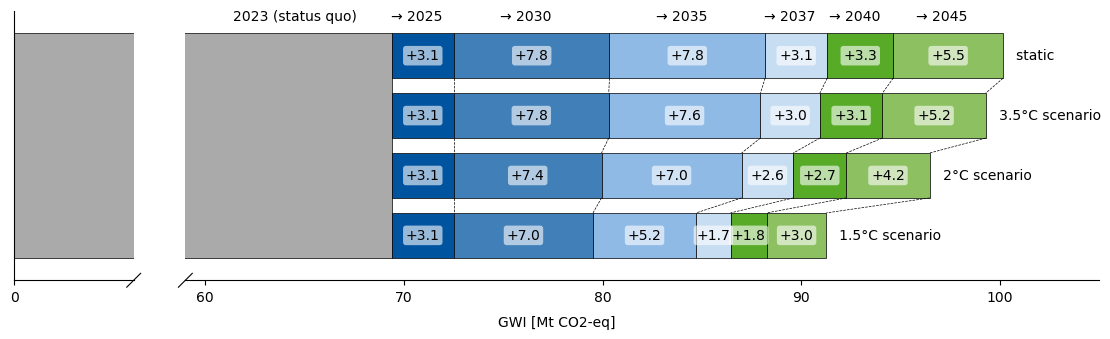

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
from brokenaxes import brokenaxes

# Data
data_base = {"Score": [69383294328.312 / 1e9]}
df_base = pd.DataFrame(data_base)

data_static = {"Score": df_components["static"].sum().values / 1e9}
df_static = pd.DataFrame(data_static)

data_ssp2_base = {"Score": df_components["Base"].sum().values / 1e9}
df_ssp2_base = pd.DataFrame(data_ssp2_base)

data_rcp26 = {"Score": df_components["RCP26"].sum().values / 1e9}
df_rcp26 = pd.DataFrame(data_rcp26)

data_rcp19 = {"Score": df_components["RCP19"].sum().values / 1e9}
df_rcp19 = pd.DataFrame(data_rcp19)

# Figure and broken axes setup
fig = plt.figure(figsize=(14, 3.5))
fig.subplots_adjust(wspace=0.1)
bax = brokenaxes(xlims=((0, 6), (59, 105)), d=0.007)
bax.set_ylim(-1.2, 1.2)

# Base bar settings
addon_start = sum(df_base["Score"])
base_bar_height = 2
addon_bar_height = 0.4

# Plot the base product score
left_extent = 0
for score in df_base["Score"]:
    bax.barh(0, width=score, left=left_extent, height=base_bar_height,
             color="#aaaaaa", edgecolor="black", linewidth=0.5)
    bax.text(64.5, 1.15, "2023 (status quo)", ha="center", va="center", color="black",)
    left_extent += score

# Function to plot add-ons
def plot_addons(df, addon_start, y_position, bar_height, label, colors):
    total_width = addon_start
    bbox_props = dict(
        boxstyle="round,pad=0.2", ec="none", fc="white", alpha=0.6
    )
    for idx, score in enumerate(df["Score"]):
        bax.barh(y_position, width=score, left=addon_start, height=bar_height,
                 color=colors[idx], edgecolor="black", linewidth=0.5)
        bax.text(
            addon_start + score / 2, y_position, f"+{round(score, 1)}", ha="center", va="center", color="black", bbox=bbox_props
            
        )
        addon_start += score
        total_width += score
    bax.text(total_width, y_position, label, ha="left", va="center")

# Color settings
colors_addon = [
    cm.RWTHBlau.p(100), cm.RWTHBlau.p(75), cm.RWTHBlau.p(50),
    cm.RWTHBlau.p(25), cm.RWTHGruen.p(100), cm.RWTHGruen.p(75)
]

yshift_1 = 0.8
yshift_2 = 0.2666667

# Plot the static and prospective add-ons
plot_addons(df_static, addon_start, yshift_1, addon_bar_height, "   static", colors_addon)
plot_addons(df_ssp2_base, addon_start, yshift_2, addon_bar_height, "   3.5°C scenario", colors_addon)
plot_addons(df_rcp26, addon_start, -yshift_2, addon_bar_height, "   2°C scenario", colors_addon)
plot_addons(df_rcp19, addon_start, -yshift_1, addon_bar_height, "   1.5°C scenario", colors_addon)


year_label_pos = addon_start
for val, yr in zip(df_static["Score"], ["→ 2025", "→ 2030", "→ 2035", "→ 2037", "→ 2040", "→ 2045"]):
    bax.text(year_label_pos + val / 2 - 0.3, 1.15, yr, ha="center", va="center", color="black")
    year_label_pos += val

# connecting lines between the bars
x_static_counting = addon_start
x_base_counting = addon_start
x_rcp26_counting = addon_start
x_rcp19_counting = addon_start
for x_static, x_base, x_26, x_19 in zip(df_static.values, df_ssp2_base.values, df_rcp26.values, df_rcp19.values):
    x_static_counting = x_static_counting + x_static
    
    x_base_counting = x_base_counting + x_base
    bax.plot([x_static_counting, x_base_counting], [yshift_1 - addon_bar_height / 2, yshift_2 + addon_bar_height / 2], color="black", linewidth=0.5, linestyle="--")
    
    x_rcp26_counting = x_rcp26_counting + x_26
    bax.plot([x_base_counting, x_rcp26_counting], [yshift_2 - addon_bar_height / 2, -yshift_2 + addon_bar_height / 2], color="black", linewidth=0.5, linestyle="--")
    
    x_rcp19_counting = x_rcp19_counting + x_19
    bax.plot([x_rcp26_counting, x_rcp19_counting], [-yshift_2 - addon_bar_height / 2, -yshift_1 + addon_bar_height / 2], color="black", linewidth=0.5, linestyle="--")


bax.set_xlabel("GWI [Mt CO2-eq]", labelpad=25)
bax.axs[0].set_yticks([])
bax.axs[0].set_yticklabels([])

plt.savefig("fig_expansion_overview.svg", format="svg", bbox_inches='tight')
plt.show()



## Contributions

In [39]:
def map_labels(labels, groups, other_label="other"):
    new_labels = {}
    for label in labels:
        for key, group in groups.items():
            if key in label:
                new_labels[label] = group
                break
        else:
            new_labels[label] = other_label
    return new_labels

### Components

In [40]:
components = pd.DataFrame({
    "static": df_components["static"].T.sum().values,
    "Base": df_components["Base"].T.sum().values,
    "RCP26": df_components["RCP26"].T.sum().values,
    "RCP19": df_components["RCP19"].T.sum().values
}, index=df_components.index)

component_groups = {
    "Overhead line": "overhead lines",
    "cable": "cables",
    "Transformer": "transformers",
    "switchgear": "switchgears",
    "Substation": "substations",
}

components.index = components.index.map(
    map_labels(components.index, component_groups, other_label="other components")
)
components = components.groupby(level=0).sum()

# sorting
components['sort_key'] = components.index != 'other components'
components = components.sort_values(by=['sort_key', "static"], ascending=[True, True])
components = components.drop(columns='sort_key')

components.loc["SPACING"] = [0, components['static'].sum() - components['Base'].sum(), components['static'].sum() - components['RCP26'].sum(), components['static'].sum() - components['RCP19'].sum()]
components

,static,Base,RCP26,RCP19
substations,3.814100e+08,3.635553e+08,3.134279e+08,2.759815e+08
transformers,1.364650e+09,1.307536e+09,1.165226e+09,9.537986e+08
switchgears,2.494637e+09,2.487944e+09,2.467959e+09,2.427002e+09
overhead lines,1.302151e+10,1.263716e+10,1.136715e+10,9.147036e+09
cables,1.350520e+10,1.310008e+10,1.175839e+10,9.067497e+09
SPACING,0.000000e+00,8.711372e+08,3.695257e+09,8.896095e+09


### Materials

In [41]:
if recalculate :
    results_materials = {}
    bioflows = {}
    material_sums = {}

    for node in static_expansion_nodes + prospective_expansion_nodes:
        component_results = {}
        lca = bc.LCA({node: 1}, method=method)
        lca.lci(factorize=True)
        for component in node.technosphere():
            material_results = {}
            for material in list(component.input.technosphere()):
                lca.lcia(demand={material.input.id: material.amount * component.amount})
                material_results[material.input['name']] = lca.score 
            for bioflow in component.input.biosphere():
                bioflows[component.input['name']] = bioflow
            component_results[component.input['name']] = material_results
            
        results_materials[node["name"]] = component_results

    # Sum up materials
    for scenario, comp in results_materials.items():
        for component, materials in comp.items():
            for material, value in materials.items():
                if material not in material_sums:
                    material_sums[material] = {}
                if scenario not in material_sums[material]:
                    material_sums[material][scenario] = 0
                material_sums[material][scenario] += value
                
    with open("data/expansion_materials_results.json", "w") as f:
        json.dump(material_sums, f)

In [43]:
results_materials = json.load(open("data/expansion_materials_results.json"))
materials = pd.DataFrame.from_dict(results_materials, orient='index')

In [44]:
# Add SF6 leakage
distributed_components = json.load(open("data/distributed_components.json"))

sf6_row = {}

for col, year in zip(
    materials.columns,
    [2023, 2025, 2030, 2035, 2037, 2040, 2023, 2025, 2030, 2035, 2037, 2040, 2023, 2025, 2030, 2035, 2037, 2040, 2023, 2025, 2030, 2035, 2037, 2040],
):
    sf6_impact = distributed_components[str(year)]["gas_insulated_switchgear_420kv"] * 28.6 * 25200 # emissions and CF of sf6
    sf6_row[col] = sf6_impact

materials.loc["sulfur hexafluoride"] = sf6_row

In [45]:
material_groups = {
    "aluminium": "aluminium",
    "copper": "copper",
    "iron": "iron & steel",
    "steel": "iron & steel",
    "concrete": "concrete",
    "cement": "concrete",
    "sulfur hexafluoride": "SF6",
    "polyethylene": "plastics",
    "polypropylene": "plastics",
    "plastic": "plastics",
}

materials.index = materials.index.map(
    map_labels(materials.index, material_groups, other_label="other materials")
)
materials = materials.groupby(level=0).sum()

materials.columns = pd.MultiIndex.from_tuples(
    [(col.split('_', 2)[1], col.rsplit('_', 1)[1]) for col in materials.columns]
)

materials = pd.DataFrame({
    "static": materials["static"].T.sum().values,
    "Base": materials["Base"].T.sum().values,
    "RCP26": materials["RCP26"].T.sum().values,
    "RCP19": materials["RCP19"].T.sum().values,
}, index=materials.index)

# sorting
materials['sort_key'] = materials.index != 'other materials'
materials = materials.sort_values(by=['sort_key', "static"], ascending=[True, True])
materials = materials.drop(columns='sort_key')

materials.loc["SPACING"] = [0, materials['static'].sum() - materials['Base'].sum(), materials['static'].sum() - materials['RCP26'].sum(), materials['static'].sum() - materials['RCP19'].sum()]
materials

,static,Base,RCP26,RCP19
other materials,1.640372e+09,1.601614e+09,1.500779e+09,1.330792e+09
concrete,1.261635e+09,1.245235e+09,1.075385e+09,9.945494e+08
plastics,2.138492e+09,2.100820e+09,1.984358e+09,1.685277e+09
SF6,2.302660e+09,2.301923e+09,2.300104e+09,2.298658e+09
copper,5.024421e+09,4.843711e+09,4.135848e+09,3.135350e+09
iron & steel,5.477935e+09,5.237239e+09,4.594727e+09,4.047973e+09
aluminium,1.292190e+10,1.256573e+10,1.148095e+10,8.378717e+09
SPACING,0.000000e+00,8.711372e+08,3.695257e+09,8.896095e+09


### Processes

In [46]:
import bw2analyzer as ba

In [47]:
if recalculate:
    process_results = {}
    product_impacts_static = {}
    product_impacts_base = {}
    product_impacts_rcp26 = {}
    product_impacts_rcp19 = {}

    lca = bc.LCA(
        {static_expansion_nodes[0]: 1}, method=method
    )  # just to build the matrices
    lca.lci(factorize=True)
    for node in static_expansion_nodes:
        lca.lcia(demand={node.id: 1})
        top_processes = ba.ContributionAnalysis().annotated_top_processes(lca, limit=1000)
        for process in top_processes:
            if process[2]["reference product"] in product_impacts_static:
                product_impacts_static[process[2]["reference product"]] += process[0]
            else:
                product_impacts_static[process[2]["reference product"]] = process[0]
    process_results["static"] = product_impacts_static

    for node in prospective_expansion_nodes_base:
        lca = bc.LCA({node: 1}, method=method)
        lca.lci()
        lca.lcia()
        top_processes = ba.ContributionAnalysis().annotated_top_processes(lca, limit=1000)
        for process in top_processes:
            if process[2]["reference product"] in product_impacts_base:
                product_impacts_base[process[2]["reference product"]] += process[0]
            else:
                product_impacts_base[process[2]["reference product"]] = process[0]
    process_results["Base"] = product_impacts_base

    for node in prospective_expansion_nodes_rcp26:
        lca = bc.LCA({node: 1}, method=method)
        lca.lci()
        lca.lcia()
        top_processes = ba.ContributionAnalysis().annotated_top_processes(lca, limit=1000)
        for process in top_processes:
            if process[2]["reference product"] in product_impacts_rcp26:
                product_impacts_rcp26[process[2]["reference product"]] += process[0]
            else:
                product_impacts_rcp26[process[2]["reference product"]] = process[0]
    process_results["RCP26"] = product_impacts_rcp26

    for node in prospective_expansion_nodes_rcp19:
        lca = bc.LCA({node: 1}, method=method)
        lca.lci()
        lca.lcia()
        top_processes = ba.ContributionAnalysis().annotated_top_processes(lca, limit=1000)
        for process in top_processes:
            if process[2]["reference product"] in product_impacts_rcp19:
                product_impacts_rcp19[process[2]["reference product"]] += process[0]
            else:
                product_impacts_rcp19[process[2]["reference product"]] = process[0]
    process_results["RCP19"] = product_impacts_rcp19

    with open("data/expansion_process_results.json", "w") as f:
        json.dump(process_results, f)

In [48]:
process_results = json.load(open("data/expansion_process_results.json"))
processes = pd.DataFrame(process_results)

product_groups = {
    "electricity": "electricity",
    "heat": "heat",
    "transport": "transport",
    "aluminium": "aluminium (process emissions)",
    "iron": "iron & steel (process emissions)",
    "steel": "iron & steel (process emissions)",
    "coal": "coal",
    "coke": "coal",
    "clinker": "clinker",
    "diesel": "transport",
    "Gas insulated switchgear": "SF6",
    "sulfur hexafluoride": "SF6",
}

processes.index = processes.index.map(
    map_labels(
        processes.index, product_groups, other_label="other processes"
    )
)

processes = processes.groupby(level=0).sum()

# sorting
processes['sort_key'] = processes.index != 'other processes'
processes = processes.sort_values(by=['sort_key', "static"], ascending=[True, True])
processes = processes.drop(columns='sort_key')

processes.loc["SPACING"] = [0, processes['static'].sum() - processes['Base'].sum(), processes['static'].sum() - processes['RCP26'].sum(), processes['static'].sum() - processes['RCP19'].sum()]
processes

,static,Base,RCP26,RCP19
other processes,3.467266e+09,3.413861e+09,3.401665e+09,3.415660e+09
clinker,9.845274e+08,9.814810e+08,7.399148e+08,7.282934e+08
aluminium (process emissions),1.659360e+09,1.659771e+09,1.659778e+09,1.660076e+09
transport,1.716158e+09,1.689090e+09,1.652182e+09,1.573991e+09
SF6,2.295328e+09,2.295329e+09,2.295330e+09,2.295332e+09
coal,2.580012e+09,2.489900e+09,2.224287e+09,1.605565e+09
iron & steel (process emissions),2.844062e+09,2.696450e+09,2.361009e+09,2.057190e+09
heat,3.515677e+09,3.509251e+09,3.517160e+09,3.543474e+09
electricity,1.159214e+10,1.104261e+10,9.096151e+09,4.881194e+09
SPACING,0.000000e+00,8.767891e+08,3.707052e+09,8.893752e+09


### Plotting

In [49]:
def round_to_percentages(df):
    # Apply rounding and adjustment to ensure percentages sum to 100%
    def adjust_to_100(absolute_values):
        total = absolute_values.sum()
        percentages = (absolute_values / total * 100).round()
        difference = 100 - percentages.sum()

        if difference != 0:
            # Adjust the row with the largest decimal part to match 100%
            idx = (absolute_values / total * 100 - percentages).abs().idxmax()
            percentages.at[idx] += difference

        return percentages

    # Apply the rounding function to each column (scenario)
    return df.apply(adjust_to_100, axis=0)

In [72]:
from RWTHColors import ColorManager

cm = ColorManager()

plot_colors = []
plot_colors_light = []
color_list = [
    cm.RWTHBlau,
    #   cm.RWTHPetrol,
    cm.RWTHTuerkis,
    cm.RWTHGruen,
    cm.RWTHMaiGruen,
    cm.RWTHOrange,
    cm.RWTHRot,
    # cm.RWTHBordeaux,
    # cm.RWTHViolett,
    cm.RWTHLila,
]
intensities = [100, 50, 10]

for intensity in intensities:
    for color in color_list:
        plot_colors.append(color.p(intensity))

for intensity in [75, 50, 10]:
    for color in color_list:
        plot_colors_light.append(color.p(intensity))

plot_colors_components = [
    cm.RWTHPetrol.p(100), # overhead lines
    cm.RWTHGruen.p(100), # cables
    cm.RWTHMagenta.p(75), # switchgears
    cm.RWTHLila.p(100), # transformers
    cm.RWTHViolett.p(100), # substations
]

# plot_colors_components = [
#     cm.RWTHBlau.p(100), # overhead lines
#     cm.RWTHGruen.p(100), # overhead lines
#     cm.RWTHOrange.p(100), # switchgears
#     cm.RWTHLila.p(100), # switchgears
#     cm.RWTHViolett.p(100), # substations
# ]

plot_colors_materials = [
    cm.RWTHOrange.p(100), # aluminium
    cm.RWTHTuerkis.p(100), # iron & steel
    cm.RWTHRot.p(75), # copper
    cm.RWTHMaiGruen.p(100), # SF6
    cm.RWTHGelb.p(75), # plastics
    cm.RWTHPetrol.p(50), # concrete  
    cm.RWTHSchwarz.p(50), # other materials
]
# plot_colors_materials = [
#     cm.RWTHBlau.p(75), # overhead lines
#     cm.RWTHTuerkis.p(75), # iron & steel
#     cm.RWTHGruen.p(75), # overhead lines
#     cm.RWTHMaiGruen.p(100), # plastics
#     cm.RWTHOrange.p(75), # switchgears
#     cm.RWTHLila.p(75), # switchgears
#     cm.RWTHViolett.p(75), # concrete  
# ]

plot_colors_processes = [
    cm.RWTHGelb.p(100), # electricity
    cm.RWTHRot.p(50), # heat
    cm.RWTHTuerkis.p(50), # iron & steel (process emissions)
    cm.RWTHSchwarz.p(75), # coal
    cm.RWTHMaiGruen.p(100), # SF6
    cm.RWTHBlau.p(50), # transport
    cm.RWTHOrange.p(50), # aluminium (process emissions)
    cm.RWTHViolett.p(75), # clinker
    cm.RWTHSchwarz.p(50), # other processes
]

# plot_colors_processes = [
#     cm.RWTHBlau.p(50), # overhead lines
#     cm.RWTHTuerkis.p(50), # iron & steel
#     cm.RWTHGruen.p(50), # overhead lines
#     cm.RWTHMaiGruen.p(50), # plastics
#     cm.RWTHGelb.p(50), # SF6
#     cm.RWTHOrange.p(50), # switchgears
#     cm.RWTHBordeaux.p(50),
#     cm.RWTHLila.p(50), # switchgears
#     cm.RWTHViolett.p(50), # substations
# ]

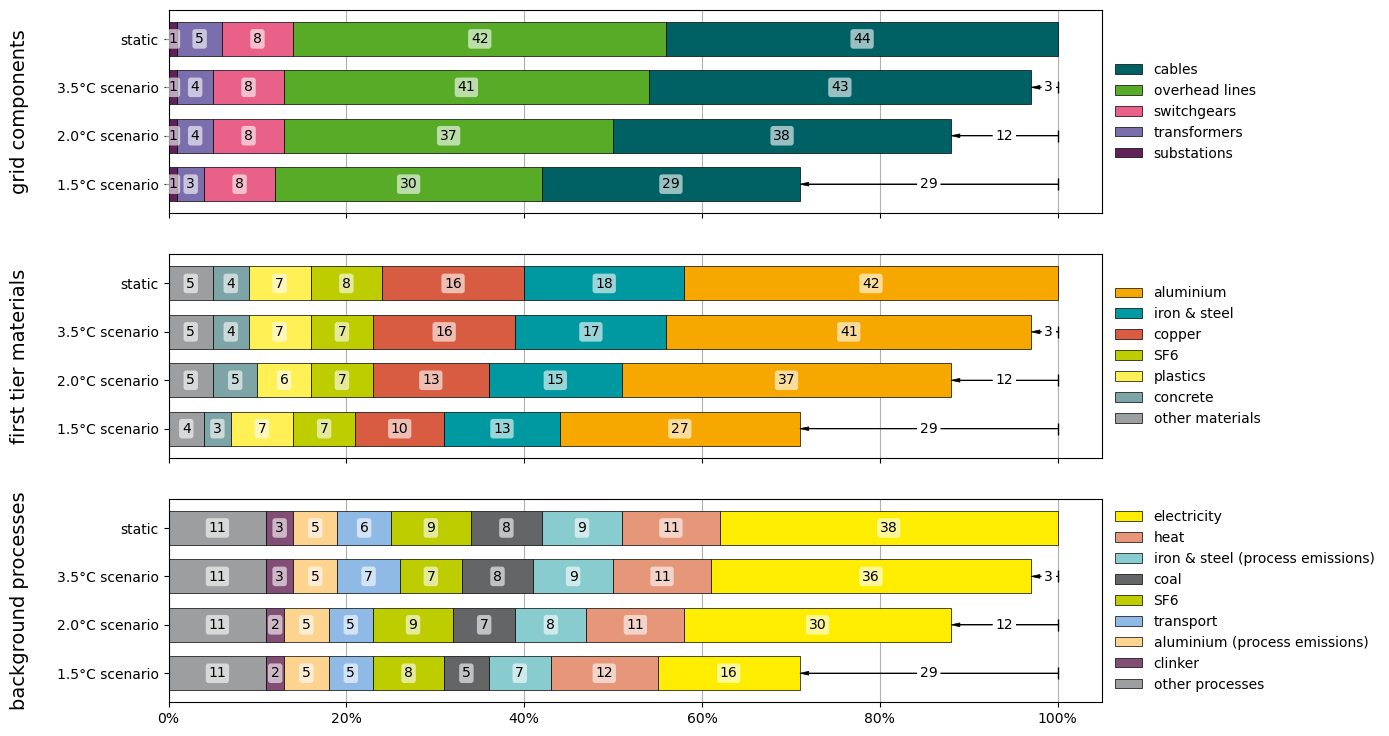

In [73]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import RWTHColors

plt.style.use("rwth")

components_plot = round_to_percentages(components)
materials_plot = round_to_percentages(materials)
processes_plot = round_to_percentages(processes)

label_mapping = {
    "Base": "3.5°C scenario", 
    "RCP26": "2.0°C scenario", 
    "RCP19": "1.5°C scenario",
}
for df in [components_plot, materials_plot, processes_plot]:
    df.columns = df.columns.map(lambda x:label_mapping.get(x, x))


fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 7.5), sharex=True)
plt.subplots_adjust(hspace=0.6)

general_plot_kwargs = dict(
    kind="barh",
    stacked=True,
    width=0.7,
    edgecolor="black",
    linewidth=0.5,
)
# component_colors = ["none"] + plot_colors[: len(components_plot) - 1]
component_colors = ["none"] + plot_colors_components
components_plot.T.plot(ax=axes[0], color=component_colors[::-1], **general_plot_kwargs)

# material_colors = ["none"] + plot_colors[: len(materials_plot) - 2] + ["#aaaaaa"]
material_colors = ["none"] + plot_colors_materials
materials_plot.T.plot(ax=axes[1], color=material_colors[::-1], **general_plot_kwargs)

# process_colors = ["none"] + plot_colors[: len(processes_plot) - 2] + ["#aaaaaa"]
process_colors = ["none"] + plot_colors_processes
processes_plot.T.plot(ax=axes[2], color=process_colors[::-1], **general_plot_kwargs)

# Increase the size of the labels
axes[0].set_ylabel("grid components", fontsize=14, labelpad=20) 
axes[1].set_ylabel("first tier materials", fontsize=14, labelpad=20) 
axes[2].set_ylabel("background processes", fontsize=14, labelpad=20) 

for idx, (ax, data) in enumerate(zip(axes, [components_plot, materials_plot, processes_plot])):
    ax.invert_yaxis()
    ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    handles, labels = ax.get_legend_handles_labels()
    handles, labels = zip(*[(h, l) for h, l in zip(handles, labels) if l != "SPACING"])
    ax.legend(
        handles[::-1],
        labels[::-1],
        loc="center left",
        bbox_to_anchor=(1, 0.5),
        frameon=False,
    )
    
    ax.xaxis.grid(True)
    ax.set_axisbelow(True)

    totals = data.sum(axis=1)

    # Adding percentage labels to each bar
    for bar in ax.patches:
        width = (
            bar.get_width()
        )  # Get the width of the bar (which is the length along the x-axis)
        label_x_pos = bar.get_x() + width / 2  # X position for the label
        label_y_pos = bar.get_y() + bar.get_height() / 2  # Y position for the label
        total_width = sum(
            [p.get_width() for p in ax.patches if p.get_y() == bar.get_y()]
        )  # Sum width of all bars in this row
        percentage = width
        percentage_text = f"{int(percentage)}"
        if percentage > 0:
            rotation = 0
            fontsize = 10
            bbox_props = dict(
                boxstyle="round,pad=0.2", ec="none", fc="white", alpha=0.6
            )
            if bar in ax.patches[-4:]: 
                bbox_props = dict(
                    boxstyle="round,pad=0.2", ec="none", fc="white", alpha=1
                )
                if percentage < 5:
                    label_x_pos = label_x_pos + 0.5
            
            if idx == 0 and bar in ax.patches[:4]:
                # label_y_pos = label_y_pos - 0.15
                # label_x_pos = label_x_pos + 0.7
                # fontsize=8
                # rotation=90
                percentage_text = f"{int(percentage)}"
                
                
            # if idx == 0 and bar in ax.patches[4:8]:
            #     # label_y_pos = label_y_pos + 0.15
            #     rotation=90
                
            ax.text(
                label_x_pos,
                label_y_pos,
                percentage_text,
                ha="center",
                va="center",
                rotation=rotation,
                fontsize=fontsize,
                bbox=bbox_props,
            )

    # arrows from right end of bars
    for bar in ax.patches[-3:]:
        bar.set_edgecolor("none")

        x_end = bar.get_x() + bar.get_width()  # The end x-coordinate of the bar
        y_position = bar.get_y() + bar.get_height() / 2  # The vertical center of the bar

        head_width = bar.get_height() / 9
        head_length = 1
        ax.arrow(
            x_end,
            y_position,
            -bar.get_width() + head_length,
            0,  # Add head_length so arrowhead doesn't extend beyond the bar
            head_width=head_width,
            head_length=head_length,
            width=0.01,
            fc="black",
            ec="black",
            lw=0.5,
        )
        ax.plot(x_end, y_position, marker="|", color="black", markersize=8)

# axes[-1].set_xlabel("GWI contributions [%]")
axes[-1].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x)}%"))

plt.tight_layout(h_pad=0.5)
plt.savefig("fig_contributions.svg", format="svg", bbox_inches='tight')

plt.show()


## Other

Copper comparison today vs 2050

In [348]:
c_23 = bd.Database("ei310_SSP2_RCP26_2023").search("market for copper, cathode GLO")[0]
c_45 = bd.Database("ei310_SSP2_RCP26_2045").search("market for copper, cathode GLO")[0]

a_23 = bd.Database("ei310_SSP2_RCP26_2023").search("market for aluminium, wrought alloy GLO")[0]
a_45 = bd.Database("ei310_SSP2_RCP26_2045").search("market for aluminium, wrought alloy GLO")[0]


In [346]:
lca = bc.LCA({c_23: 1}, method=method)
lca.lci()
lca.lcia()
lca.score

/Users/timodiepers/anaconda3/envs/plca-grid-expansion/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 1.42e+13)
  warnings.warn(msg, UmfpackWarning)


6.455734497782667

In [347]:
lca = bc.LCA({c_45: 1}, method=method)
lca.lci()
lca.lcia()
lca.score

/Users/timodiepers/anaconda3/envs/plca-grid-expansion/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 1.21e+13)
  warnings.warn(msg, UmfpackWarning)


3.3904403277070507

In [351]:
lca = bc.LCA({a_23: 1}, method=method)
lca.lci()
lca.lcia()
lca.score

/Users/timodiepers/anaconda3/envs/plca-grid-expansion/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 1.42e+13)
  warnings.warn(msg, UmfpackWarning)


11.57862346517534

In [352]:
lca = bc.LCA({a_45: 1}, method=method)
lca.lci()
lca.lcia()
lca.score

/Users/timodiepers/anaconda3/envs/plca-grid-expansion/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 1.21e+13)
  warnings.warn(msg, UmfpackWarning)


6.770893739529213

In [11]:
al_23 = bd.Database("ei310_SSP2_RCP26_2023").search("market for aluminium, wrought GLO")[0]
al_40 = bd.Database("ei310_SSP2_RCP26_2040").search("market for aluminium, wrought GLO")[0]

In [31]:
lca = bc.LCA({bd.Database("ei310_SSP2_RCP26_2023").search("market for aluminium, wrought GLO")[0]: 1}, method=method)
lca.lci()
lca.lcia()
lca.score

/Users/timodiepers/anaconda3/envs/plca-grid-expansion/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 1.42e+13)
  warnings.warn(msg, UmfpackWarning)


11.57862346517534

In [30]:
el = bd.Database("ei310_SSP2_RCP26_2040").search("market group for electricity, high voltage DE")[0]

In [24]:
el = bd.Database("ei310_SSP2_RCP26_2040").search("market group for electricity, high voltage CHN")[0]

In [31]:
lca = bc.LCA({el: 1}, method=method)
lca.lci()
lca.lcia()
lca.score

/Users/timodiepers/anaconda3/envs/plca-grid-expansion/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 2.14e+13)
  warnings.warn(msg, UmfpackWarning)


0.10213535636501127

In [32]:
lca = bc.LCA({bd.Database("ei310_SSP2_RCP26_2040").search("market for aluminium, wrought GLO")[0]: 1}, method=method)
lca.lci()
lca.lcia()
lca.score

/Users/timodiepers/anaconda3/envs/plca-grid-expansion/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 2.14e+13)
  warnings.warn(msg, UmfpackWarning)


8.87389924007463

In [12]:
from polyviz import sankey

In [16]:
sankey(activity=al_40, method=method, level=10)

Calculating supply chain score...


/Users/timodiepers/anaconda3/envs/plca-grid-expansion/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 2.14e+13)
  warnings.warn(msg, UmfpackWarning)


Sankey diagram generated.


('/Users/timodiepers/Documents/Coding/paper-plca-grid-expansion/market for aluminium wrought alloy kilogram GLO EF v31 no LTclimate change no LTglobal warming potential GWP100 no LT sankey.html',
                                                 source  \
 0                m. for aluminium, wrought alloy (GLO)   
 1                              activities below cutoff   
 2    aluminium ingot, primary, to aluminium, wrough...   
 3    treatment of aluminium scrap, new, at remelter...   
 130                                          emissions   
 ..                                                 ...   
 173                                          emissions   
 128                            activities below cutoff   
 174                                          emissions   
 129                            activities below cutoff   
 175                                          emissions   
 
                                         target        weight       unit  
 0        m. for al